In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from cross_val_tool import cross_validation
from time import time
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals import joblib
from sklearn.cross_validation import ShuffleSplit
import os
from sklearn.svm import SVC
import datetime
from __future__ import division

%matplotlib inline

In [39]:
disposition_analysis = pd.read_csv('./disposition_analysis.csv')

In [40]:
disposition_analysis.shape

(83967, 8)

In [41]:
disposition_analysis['User Order Facts First Order Date'] = pd.to_datetime(disposition_analysis['User Order Facts First Order Date'])
disposition_analysis['Subscription Dispositions Disposition Date'] = pd.to_datetime(disposition_analysis['Subscription Dispositions Disposition Date'])


In [42]:
disposition_analysis.dtypes

Mr User User ID                                        int64
User Order Facts First Order Date             datetime64[ns]
Subscription Dispositions Disposition Date    datetime64[ns]
Subscription Dispositions Reason                      object
User Order Facts First Order Type                     object
User Sub Facts Is Active Sub (Yes / No)               object
Calculation 1                                          int64
User Order Facts Total Lifetime Orders                 int64
dtype: object

In [46]:
disposition_analysis['User Sub Facts Is Active Sub (Yes / No)'].value_counts()

No     68223
Yes    15742
Name: User Sub Facts Is Active Sub (Yes / No), dtype: int64

In [45]:
disposition_analysis.drop(disposition_analysis['User Sub Facts Is Active Sub (Yes / No)'] == 'Yes',inplace=True)

In [47]:
disp_data = disposition_analysis[disposition_analysis['User Sub Facts Is Active Sub (Yes / No)'] == "No"]

In [48]:
disp_data["User Sub Facts Is Active Sub (Yes / No)"]

array(['No'], dtype=object)

In [49]:
disp_data['Subscription Dispositions Reason'].value_counts()

Auto-delivery - Prefer one-time            17995
Too much product on hand                   16353
Color Issue - Color Match                   9422
Price                                       5632
Color Issue - Gray Coverage                 5382
Color Issue - Color faded                   3957
3PL return                                  2224
Duplicate Subscription                      1138
Auto-delivery - Other                        957
Product Concerns                             918
Going back to the salon                      827
Sensitivity                                  665
Didn't reply / Wouldn't say                  627
Checkout Process                             560
Going gray                                   442
Shipping - Where's my order?                 404
Wasn't satisfied with color                  158
Duplicate order                              143
Not the right product                        124
Accidental, incorrect                         94
Returned            

In [50]:
disp_data.head()

,Mr User User ID,User Order Facts First Order Date,Subscription Dispositions Disposition Date,Subscription Dispositions Reason,User Order Facts First Order Type,User Sub Facts Is Active Sub (Yes / No),Calculation 1,User Order Facts Total Lifetime Orders
2,1261011,2017-08-01,2017-08-01,Checkout Process,subscription,No,0,1
5,1238812,2017-07-31,2017-07-31,Auto-delivery - Prefer one-time,subscription,No,0,1
6,1253707,2017-07-31,2017-08-03,Color Issue - Color Match,subscription,No,3,1
7,1260058,2017-07-31,2017-07-31,Color Issue - Gray Coverage,one-time,No,0,1
8,1254758,2017-07-30,2017-07-30,Not the right product,one-time,No,0,2


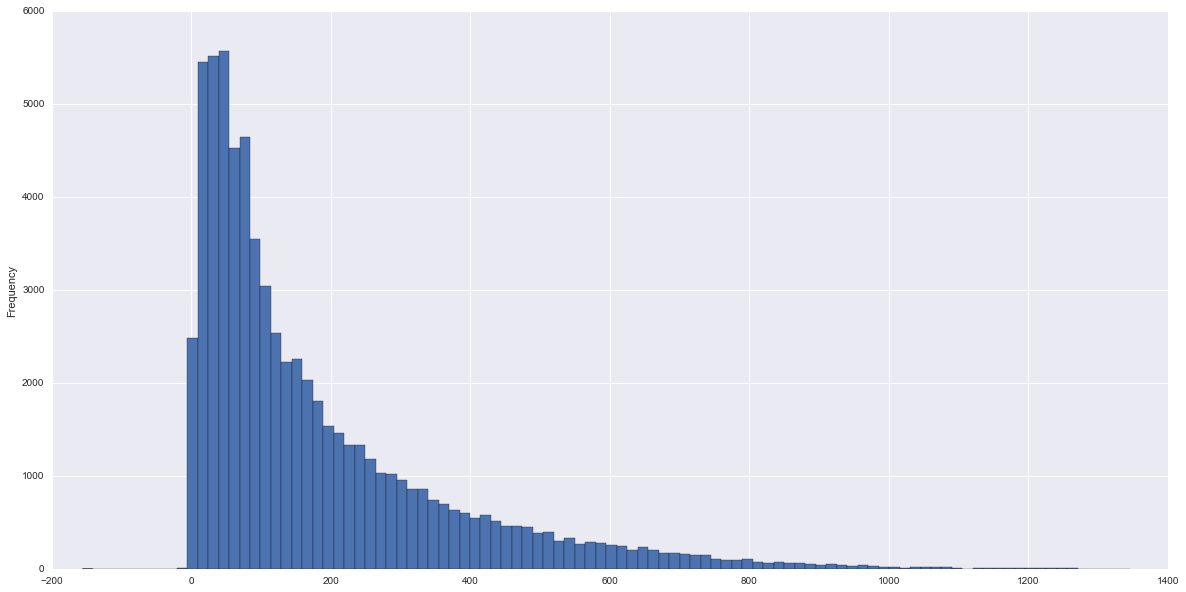

In [51]:
plt.figure(figsize=(20,10))
disp_data['Calculation 1'].plot(kind='hist',bins=100)



In [52]:
print 'the mean length of time between first order and disposition is: ' + str(disp_data['Calculation 1'].mean())
print 'the median length of time between first order and disposition is: ' + str(disp_data['Calculation 1'].median())



the mean length of time between first order and disposition is: 179.278996819
the median length of time between first order and disposition is: 111.0


In [53]:
disp_data['User Order Facts Total Lifetime Orders'].value_counts()

2     12350
1     11095
3      9026
4      6532
5      5108
6      4283
7      3336
8      2641
9      2264
10     1916
11     1541
12     1229
13     1089
14      881
15      714
16      574
17      563
18      459
19      402
21      337
20      299
22      217
23      213
25      167
24      151
27      114
26      112
28       92
29       69
30       62
32       62
33       58
31       41
34       38
38       31
41       31
35       24
36       21
37       12
51       10
44       10
43       10
40        8
49        8
39        6
42        6
47        3
53        2
57        2
50        2
58        2
Name: User Order Facts Total Lifetime Orders, dtype: int64

In [55]:
disp_data['User Sub Facts Is Active Sub (Yes / No)'].value_counts()

No    68223
Name: User Sub Facts Is Active Sub (Yes / No), dtype: int64

In [10]:
ltr = pd.read_csv('./ltr_days_between.csv')
ltr.head()

,User Order Facts Average Days Between Orders,User Order Facts One and Done (Yes / No),Average Orders Per 90 Days,90 Day LTR,Mr User User Count,Mr Order Order Count,Mr Order Average Order Value
0,NaN,Yes,NaN,NaN,55157,55158,31.027863
1,28.0,No,NaN,NaN,2487,9170,27.931058
2,56.0,No,NaN,NaN,2138,6724,27.549855
3,42.0,No,NaN,NaN,1918,6572,27.292658
4,35.0,No,NaN,NaN,1262,4940,27.788402


In [11]:
ltr = ltr[ltr['User Order Facts Average Days Between Orders']<360] 

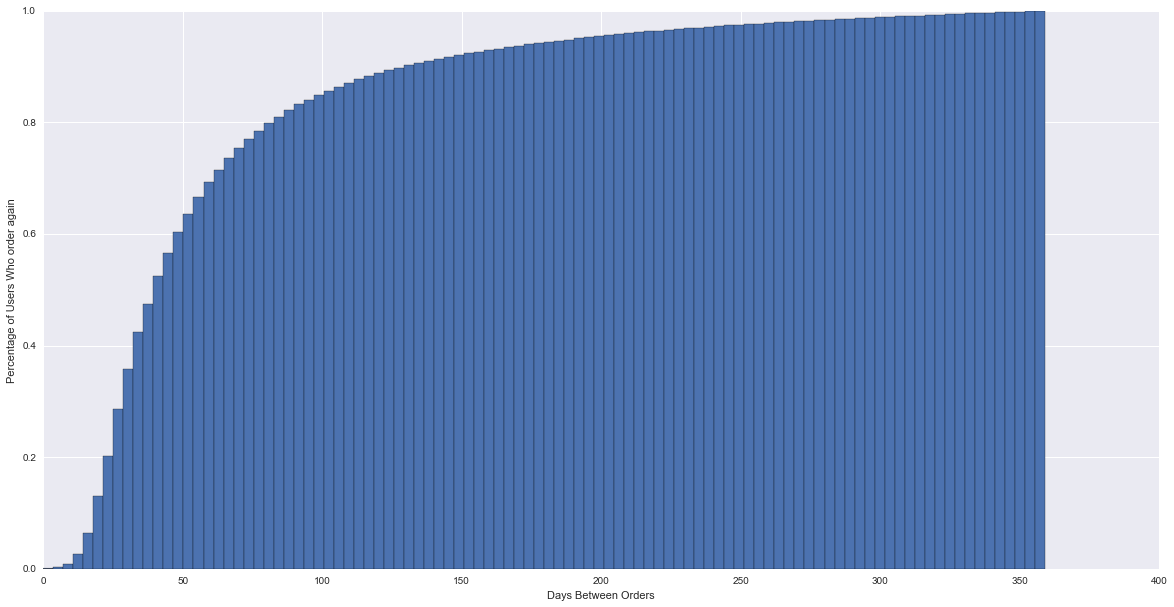

In [12]:
plt.figure(figsize=(20,10))
plt.xlabel('Days Between Orders')
plt.ylabel('Percentage of Users Who order again')
ltr['User Order Facts Average Days Between Orders'].hist(cumulative=True, normed=1, bins=100)

In [13]:
1-ltr[ltr['User Order Facts Average Days Between Orders']>60]['Mr User User Count'].sum()/(ltr[ltr['User Order Facts Average Days Between Orders']>60]['Mr User User Count'].sum()+55157) 
                                                                                          
                                                                                          
                                                                                          
                                                                                   

0.6873745996535523

In [14]:
ltr[ltr['User Order Facts Average Days Between Orders']>=60]['Mr Order Order Count'].sum()

115707

In [15]:
55157/(ltr['Mr User User Count'].sum())

0.6390346761206307

In [16]:
ltr['Mr Order Order Count'].sum()

613324

In [17]:
revenue = pd.read_excel('./revenue_recall.xlsx')
revenue.head()

,Recall,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,Unnamed: 14,Unnamed: 15
0,0.1,211.07,1055.34,2110.69,3166.03,4221.37,5276.71,6332.06,7387.40,8442.74,9498.08,10553.43,11608.77,12664.11,NaN,NaN
1,0.2,422.14,2110.69,4221.37,6332.06,8442.74,10553.43,12664.11,14774.80,16885.48,18996.17,21106.85,23217.54,25328.22,NaN,NaN
2,0.3,633.21,3166.03,6332.06,9498.08,12664.11,15830.14,18996.17,22162.20,25328.22,28494.25,31660.28,34826.31,37992.34,NaN,NaN
3,0.4,844.27,4221.37,8442.74,12664.11,16885.48,21106.85,25328.22,29549.60,33770.97,37992.34,42213.71,46435.08,50656.45,NaN,NaN
4,0.5,1055.34,5276.71,10553.43,15830.14,21106.85,26383.57,31660.28,36936.99,42213.71,47490.42,52767.14,58043.85,63320.56,NaN,NaN


In [18]:
revenue.drop(['Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True)

In [19]:
melted = pd.melt(revenue,id_vars='Recall',var_name='percent_prevent_churn')

In [20]:
melted.value = pd.to_numeric(melted.value,errors='coerce')
melted.percent_prevent_churn=pd.to_numeric(melted.percent_prevent_churn,errors='coerce')

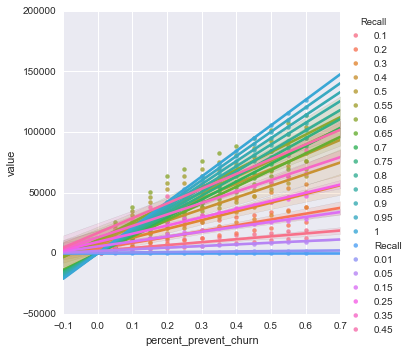

In [21]:
#sns.lmplot('percent_prevent_churn','value',data=melted, hue='Recall')
sns.lmplot(x="percent_prevent_churn", y="value", hue="Recall", data=melted);

In [22]:
def rev_predictor(time_frame, recall, prob_convert, users):
    add_rev = 24.54
    if time_frame ==90:
        mm = 1
    elif time_frame == 180:
        mm = 2
    elif time_frame == 360:
        mm = 4
    else:
        return 'Please input a value of 90, 180, or 360'
    return add_rev*recall/100.*mm*prob_convert*users

sample_fn = lambda recall: rev_predictor(90, recall,.5,14000)

from ipywidgets import interact
from ipywidgets import widgets

widgets.IntSlider(min=-10,max=30,step=1,value=10)

interact(sample_fn, recall=widgets.IntSlider(min=75,max=95,step=1,value=82))